# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as p
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


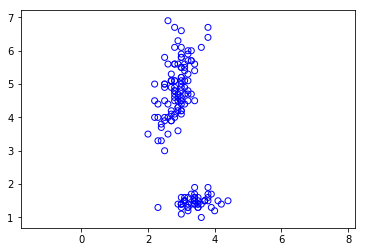

In [50]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

print np.shape(d)

print y
plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [15]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

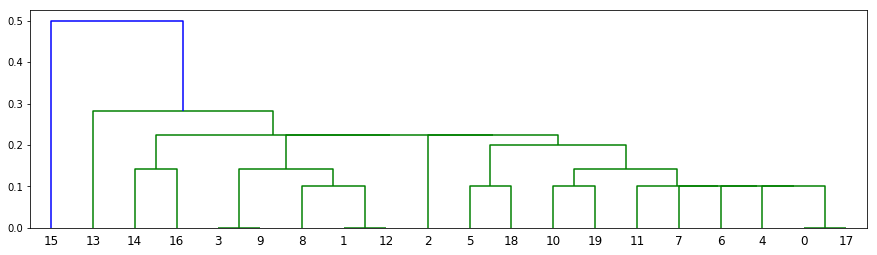

In [16]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

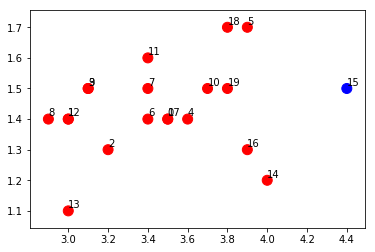

In [18]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

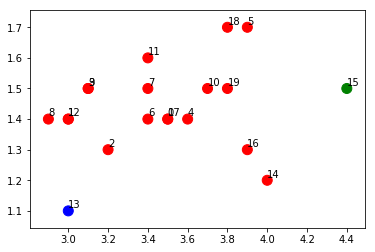

In [19]:
# Question 1.1

cl = hierarchy.fcluster(Z, 3, criterion='maxclust') # 3 clusters

plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)


It is possible to see in the figure above that the furtherst red dot was made into a new cluster, compared to the result with only two clusters

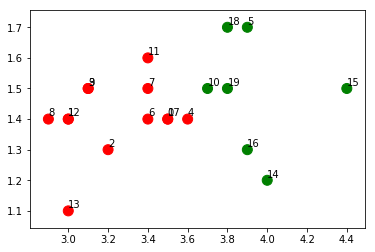

In [23]:
# Question 1.2

Z = hierarchy.linkage(dnew,method = 'complete', metric = 'euclidean')

cl = hierarchy.fcluster(Z, 3, criterion='maxclust') # 3 clusters

plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)


Using the method `complete` only 2 cluster seemed to have been found. The difference between single-link clustering and complete-link clustering is how the similarity between them is measured. For single link the similarity is measured using the most similar members. On the other hand, complete link similarity is measured using the most dissimilar members.

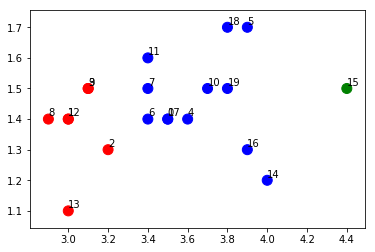

In [21]:
# Question 1.2

Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')

cl = hierarchy.fcluster(Z, 3, criterion='maxclust') # 3 clusters

plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)



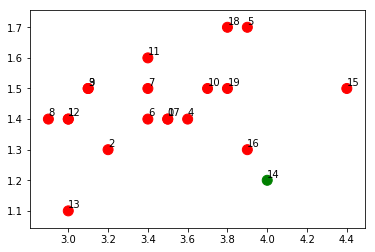

In [26]:
# Question 1.3

Z = hierarchy.linkage(dnew,method = 'single', metric = 'jaccard')

cl = hierarchy.fcluster(Z, 3, criterion='maxclust') # 3 clusters

plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)



Completely different result using the `jaccard` distance, which is defined as the size of the intersection divided by the size of the union.

In [38]:
# Question 2

A=range(0,150)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

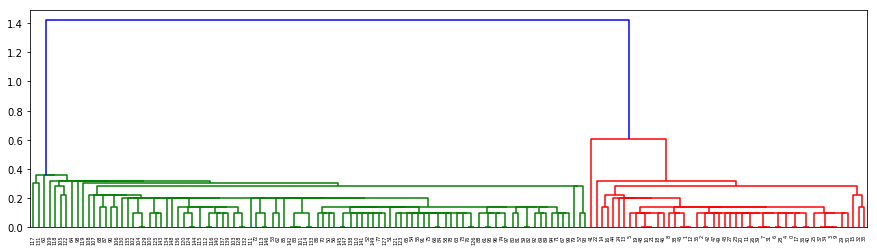

In [39]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

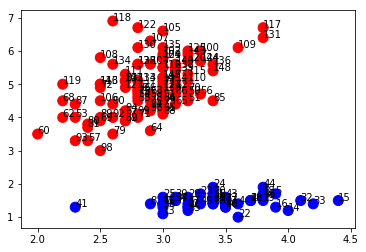

In [40]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

For the entire set, two clusters seem like a clear choice.

In [52]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1    0  50  50
2   50   0   0


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

For 2 clusters, the result is good, but from the `crosstab` result it's possible to see that 2 clusters were joined together.

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

Increasing the number of clusters does not help with the result because singular points start to form new clusters with very few points inside.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.




**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

In [53]:
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1    0  50  50
2   49   0   0
3    1   0   0


y    0   1   2
cl            
1    0   0   2
2    0  50  48
3   49   0   0
4    1   0   0


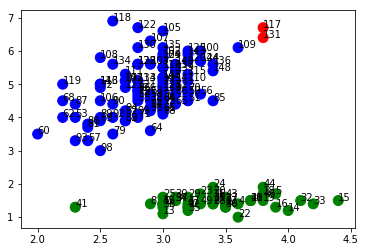

In [68]:
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

plt.figure()
colors=['red','blue', 'green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

In [58]:
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])

y    0   1   2
cl            
1    0   0   2
2    0  49  48
3    0   1   0
4   49   0   0
5    1   0   0


## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0   50   0   0
1    0   2  41
2    0  48   9


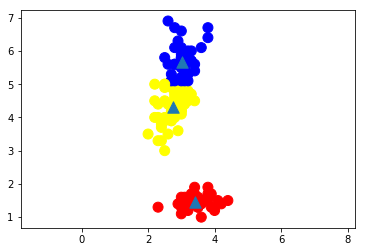

In [66]:
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])


**Question 7**. Discuss on the quality of outcome of k-means clustering

Since 5 clusters are being used it is expected that clouds that look like one cluster are divided into several. 

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

Certainly, the results look much better for the k-means. In the hiarchical the third cluster consists of very few points on the top. For k-means, the cluster looks much more well distributed.

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?